# Agrupamiento de usuarios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

## Extracción de datos

In [2]:
data = pd.read_csv("media.csv")

In [3]:
data

,id,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,MAC000002,0.564871,0.467060,0.333567,0.247704,0.225700,0.221044,0.218658,0.236706,0.320992,...,0.456533,0.401384,0.408738,0.495010,0.646573,0.959895,1.034918,0.758700,0.743129,0.655408
1,MAC000003,2.770187,2.490610,1.633416,1.531936,1.403870,1.364220,1.409778,0.645310,0.440847,...,0.276459,0.236683,0.283065,0.363131,0.419519,0.403901,0.382797,0.314847,0.286757,0.231686
2,MAC000004,0.064365,0.072109,0.069232,0.063214,0.073697,0.067660,0.070167,0.076768,0.072358,...,0.069058,0.074209,0.065041,0.072974,0.068976,0.067372,0.076414,0.073874,0.066290,0.071270
3,MAC000006,0.067458,0.060547,0.058802,0.058898,0.059649,0.065436,0.086289,0.134192,0.211087,...,0.103688,0.106514,0.110329,0.136995,0.167941,0.180069,0.177828,0.161857,0.125046,0.088017
4,MAC000007,0.158929,0.142814,0.143067,0.142440,0.135303,0.137190,0.141595,0.256774,0.526048,...,0.373234,0.318862,0.333065,0.639630,0.849073,0.677877,0.553115,0.556367,0.471518,0.278173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,MAC005549,0.239565,0.192835,0.183111,0.177499,0.182938,0.256449,0.658391,1.080552,1.139445,...,1.168603,1.186449,1.250381,1.310402,1.150570,0.920911,0.690789,0.584335,0.494886,0.351592
5560,MAC005550,0.677855,0.461027,0.286866,0.212096,0.205777,0.206086,0.205158,0.236634,0.327183,...,0.463344,0.470987,0.559024,0.627404,0.871344,0.916714,0.760739,0.663022,0.669792,0.707670
5561,MAC005551,0.183412,0.161162,0.141134,0.137985,0.147630,0.183128,0.229745,0.297925,0.372258,...,0.479347,0.468779,0.469198,0.496322,0.565021,0.646062,0.649724,0.628156,0.521153,0.283543
5562,MAC005557,0.228470,0.199356,0.178081,0.171112,0.166768,0.175656,0.190694,0.275114,0.405669,...,0.230168,0.225497,0.310377,0.437787,0.412654,0.277050,0.233878,0.240344,0.266985,0.263362


In [4]:
df = data.drop("id",axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.564871,0.467060,0.333567,0.247704,0.225700,0.221044,0.218658,0.236706,0.320992,0.484746,...,0.456533,0.401384,0.408738,0.495010,0.646573,0.959895,1.034918,0.758700,0.743129,0.655408
1,2.770187,2.490610,1.633416,1.531936,1.403870,1.364220,1.409778,0.645310,0.440847,0.403233,...,0.276459,0.236683,0.283065,0.363131,0.419519,0.403901,0.382797,0.314847,0.286757,0.231686
2,0.064365,0.072109,0.069232,0.063214,0.073697,0.067660,0.070167,0.076768,0.072358,0.078687,...,0.069058,0.074209,0.065041,0.072974,0.068976,0.067372,0.076414,0.073874,0.066290,0.071270
3,0.067458,0.060547,0.058802,0.058898,0.059649,0.065436,0.086289,0.134192,0.211087,0.203518,...,0.103688,0.106514,0.110329,0.136995,0.167941,0.180069,0.177828,0.161857,0.125046,0.088017
4,0.158929,0.142814,0.143067,0.142440,0.135303,0.137190,0.141595,0.256774,0.526048,0.651662,...,0.373234,0.318862,0.333065,0.639630,0.849073,0.677877,0.553115,0.556367,0.471518,0.278173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,0.239565,0.192835,0.183111,0.177499,0.182938,0.256449,0.658391,1.080552,1.139445,1.108773,...,1.168603,1.186449,1.250381,1.310402,1.150570,0.920911,0.690789,0.584335,0.494886,0.351592
5560,0.677855,0.461027,0.286866,0.212096,0.205777,0.206086,0.205158,0.236634,0.327183,0.502162,...,0.463344,0.470987,0.559024,0.627404,0.871344,0.916714,0.760739,0.663022,0.669792,0.707670
5561,0.183412,0.161162,0.141134,0.137985,0.147630,0.183128,0.229745,0.297925,0.372258,0.421075,...,0.479347,0.468779,0.469198,0.496322,0.565021,0.646062,0.649724,0.628156,0.521153,0.283543
5562,0.228470,0.199356,0.178081,0.171112,0.166768,0.175656,0.190694,0.275114,0.405669,0.435530,...,0.230168,0.225497,0.310377,0.437787,0.412654,0.277050,0.233878,0.240344,0.266985,0.263362


## PCA

In [5]:
df_pca = pd.DataFrame(PCA(n_components=df.shape[1]).fit_transform(df), columns=[f"PC{i}" for i in range(1,25)])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,0.438027,0.094284,-0.447019,-0.202617,0.211404,-0.005299,0.247712,-0.167788,0.029000,0.004487,...,0.107610,-0.034982,-0.024604,-0.003411,0.010015,-0.030128,0.040765,-0.031501,-0.069872,0.006158
1,1.129883,4.051196,0.593914,0.116260,-0.306607,-0.459270,0.057919,-0.403097,0.270483,0.171761,...,-0.054304,-0.033328,-0.076222,-0.082032,-0.022218,0.053445,0.041883,-0.018360,-0.035643,-0.010716
2,-1.829072,0.169124,0.104489,0.014427,0.051902,0.042789,0.001854,-0.002033,-0.004793,-0.002432,...,0.001046,0.011494,-0.000583,-0.003916,-0.010418,-0.008998,0.002077,0.003244,0.000224,-0.003955
3,-1.560637,0.044856,0.108889,0.059137,0.076590,-0.037432,0.061219,0.032772,-0.024386,0.007112,...,-0.004909,-0.011575,0.002911,-0.011578,-0.003971,-0.003564,0.002524,0.005502,0.001082,-0.002835
4,-0.081492,-0.356977,0.088095,-0.066552,0.002683,-0.106451,0.324929,0.149708,0.168963,-0.054382,...,-0.041979,-0.031470,-0.000174,-0.012727,-0.022840,-0.015958,0.020912,0.009698,0.003085,0.008286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,1.764496,-0.888436,1.197980,-0.309439,-0.218847,-0.238486,-0.336296,0.047669,-0.141622,-0.127003,...,0.016028,0.022632,-0.053060,0.032579,0.026453,-0.017879,0.021279,-0.000907,0.007545,0.015853
5560,0.371214,0.118550,-0.404248,-0.239992,-0.043539,-0.113595,0.045449,0.116795,0.143616,-0.006287,...,0.032300,-0.005191,-0.027317,0.034562,-0.017574,0.018415,-0.003583,0.019472,-0.002961,-0.013774
5561,-0.145174,-0.250553,-0.013962,-0.089935,0.042315,0.062206,0.055323,-0.098337,-0.079278,0.051965,...,-0.030515,0.004154,-0.018389,0.018908,0.033002,0.000447,0.003311,-0.010396,-0.005601,0.000799
5562,-0.866532,0.108944,0.230505,0.037812,0.016077,-0.074815,-0.023346,0.224099,0.055606,-0.029448,...,0.027935,-0.045178,-0.015197,-0.003752,-0.021456,-0.014393,0.023877,0.028416,-0.011293,0.007022


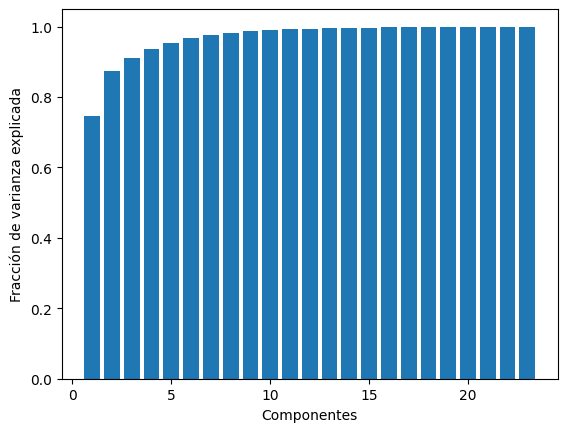

[0.7458759986829474, 0.8738217150332241, 0.911377710214516, 0.9367505574288871, 0.9544253579846877, 0.9692420090434019, 0.9769577406661645, 0.9825797221988735, 0.9867746991218629, 0.9897088015591945, 0.99213194136292, 0.9937357995936683, 0.9951556319267321, 0.9962036966274904, 0.9970335161912073, 0.9977759543278794, 0.9982774535715538, 0.9986783704917056, 0.9990393018140409, 0.9993280190778167, 0.9995753642055125, 0.9997666977201957, 0.9998894849985364]


In [6]:
x=[]
y=[]
for i in range(1,24):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(df_pca.values)
    x.append(i)
    y.append(np.sum(pca.explained_variance_ratio_))
plt.bar(x,y)
plt.xlabel('Componentes')
plt.ylabel('Fracción de varianza explicada')
plt.show()

print(y)

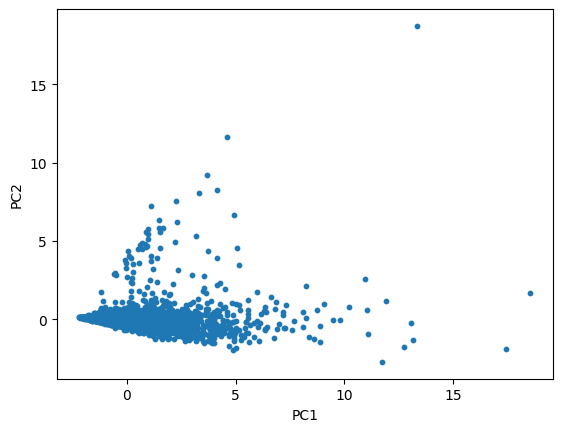

In [7]:
plt.scatter(df_pca["PC1"],df_pca["PC2"],s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [8]:
# #PCA manual

# #Z = (df.apply(lambda x: ((x-x.mean())/(x.std())))).values
# Z = df.apply(lambda x: (x-x.mean())).values


# covs = np.cov(Z.T)

# e_values, e_vectors = np.linalg.eig(covs)

# PCs = Z @ (-e_vectors)

# Zp_df = pd.DataFrame(PCs, columns = [f"PC{i}" for i in range(1,25)])

# Zp_df

In [9]:
# var_proportion = e_values/sum(e_values)
# cumvar_proportion = np.cumsum(e_values)/sum(e_values)
# plt.bar(range(len(cumvar_proportion)),cumvar_proportion)
# plt.xlabel("Componentes")
# plt.ylabel('Fracción de varianza explicada')
# plt.show()
# print()
# print(cumvar_proportion)

In [10]:
# plt.scatter(Zp_df["PC1"],Zp_df["PC2"],s=10)

## Machine Learning

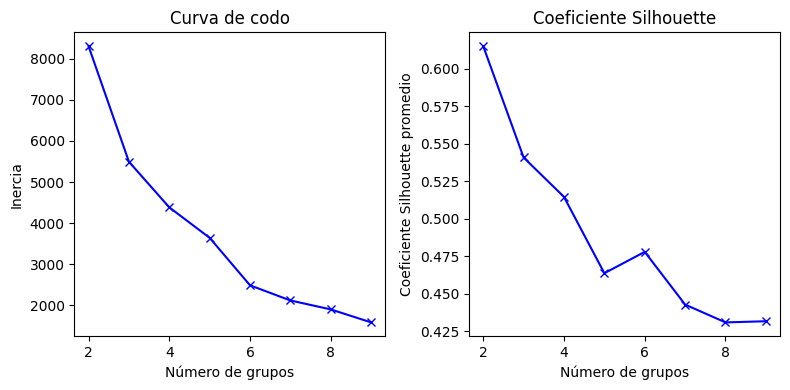

In [11]:
# k means clustering

X = df_pca.iloc[:,:2]
Sum_of_squared_distances = []
silhouette_avg = []
K = range(2,10)
for num_clusters in K :
    # inercia
    kmeans = KMeans(n_clusters=num_clusters,n_init="auto",random_state=42)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    # coeficiente silhouette
    cluster_labels = kmeans.labels_
    silhouette_avg.append(metrics.silhouette_score(X, cluster_labels))

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(8,4))
ax=axes[0]
ax.plot(K,Sum_of_squared_distances,'bx-')
ax.set_xlabel('Número de grupos')
ax.set_ylabel('Inercia')
ax.set_title('Curva de codo')
ax=axes[1]
ax.plot(K,silhouette_avg,'bx-')
ax.set_xlabel('Número de grupos')
ax.set_ylabel('Coeficiente Silhouette promedio')
ax.set_title('Coeficiente Silhouette')
plt.tight_layout()
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3,n_init="auto", random_state=42).fit(X)
results = df_pca.iloc[:,:2].copy()
results['clusters_kmeans']=kmeans.labels_
results.head()

,PC1,PC2,clusters_kmeans
0,0.438027,0.094284,1
1,1.129883,4.051196,1
2,-1.829072,0.169124,0
3,-1.560637,0.044856,0
4,-0.081492,-0.356977,0


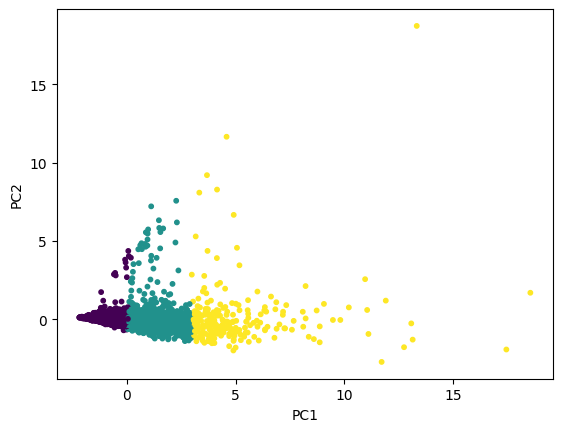

In [13]:
plt.scatter(results["PC1"],results["PC2"],c=results["clusters_kmeans"],s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
#plt.legend(loc="best")
plt.show()

In [14]:
results["clusters_kmeans"].value_counts()

clusters_kmeans
0    3485
1    1838
2     241
Name: count, dtype: int64

In [15]:
# DBSCAN clustering
X = df_pca.iloc[:,:2]
silhouette_avg = []
epss = np.arange(0.1, 1, 0.1)
for eps in epss:
    dbscan = DBSCAN(eps = eps, min_samples = 5).fit(X)
    # coeficiente silhouette
    cluster_labels = dbscan.labels_
    silhouette_avg.append(metrics.silhouette_score(X, cluster_labels))

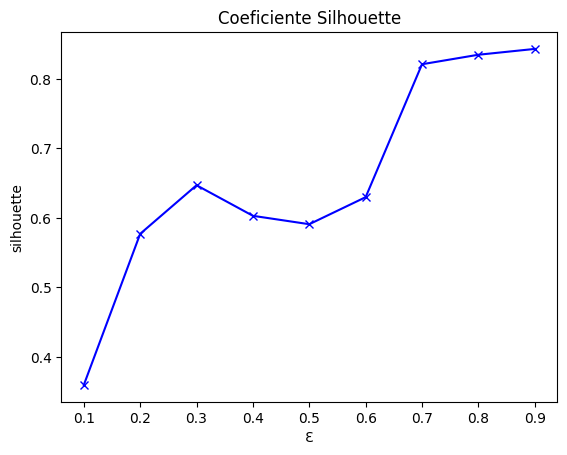

In [16]:
plt.plot(epss,silhouette_avg,'bx-')
plt.xlabel('Ɛ')
plt.ylabel('silhouette')
plt.title('Coeficiente Silhouette')
plt.show()

In [17]:
# DBSCAN clustering
X = df_pca.iloc[:,:2]
silhouette_avg = []
min_samples = np.arange(2, 10, 1)
for min_sample in min_samples:
    dbscan = DBSCAN(eps = 0.5, min_samples = min_sample).fit(X)
    # coeficiente silhouette
    cluster_labels = dbscan.labels_
    silhouette_avg.append(metrics.silhouette_score(X, cluster_labels))


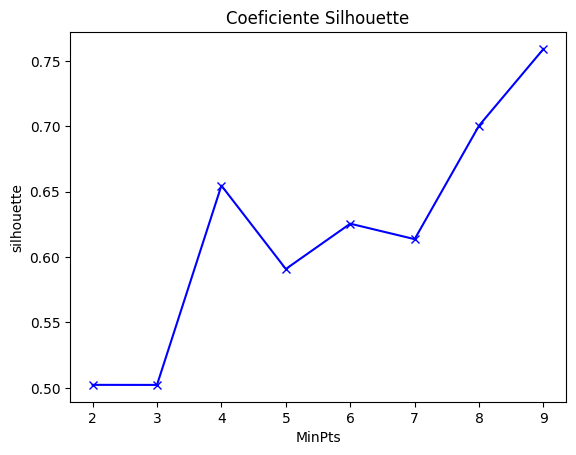

In [18]:
plt.plot(min_samples,silhouette_avg,'bx-')
plt.xlabel('MinPts')
plt.ylabel('silhouette')
plt.title('Coeficiente Silhouette')
plt.show()

In [19]:
X = df_pca.iloc[:,:2]

dbscan = DBSCAN(eps = 0.5,min_samples = 5).fit(X)
results['clusters_dbscan']=dbscan.labels_
results.head()

,PC1,PC2,clusters_kmeans,clusters_dbscan
0,0.438027,0.094284,1,0
1,1.129883,4.051196,1,-1
2,-1.829072,0.169124,0,0
3,-1.560637,0.044856,0,0
4,-0.081492,-0.356977,0,0


In [20]:
print(metrics.silhouette_score(X, dbscan.labels_))

0.5908919561429183


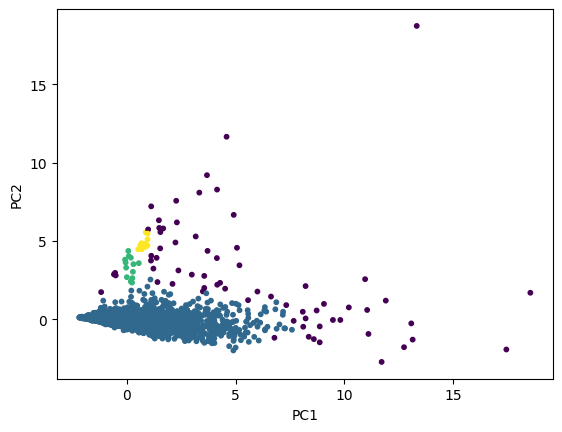

In [21]:
plt.scatter(results["PC1"],results["PC2"],c=results["clusters_dbscan"],s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [22]:
results["clusters_dbscan"].value_counts()

clusters_dbscan
 0    5473
-1      68
 1      13
 2      10
Name: count, dtype: int64

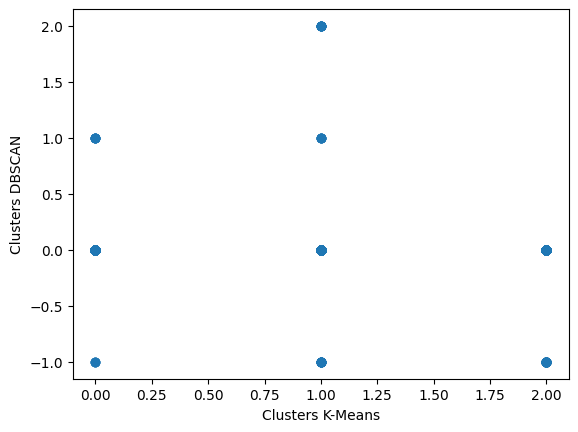

In [23]:
plt.scatter(results['clusters_kmeans'],results['clusters_dbscan'])
plt.xlabel("Clusters K-Means")
plt.ylabel("Clusters DBSCAN")
plt.show()

In [24]:
results["counts"] = 1
frecuencia = results[['clusters_kmeans',"clusters_dbscan","counts"]].groupby(['clusters_kmeans',"clusters_dbscan"]).sum()
results.drop("counts", axis=1, inplace=True)
frecuencia["freq %"] = (frecuencia["counts"]/frecuencia["counts"].sum()*100).round(4).apply(str)+"%"
frecuencia

counts    freq %
clusters_kmeans clusters_dbscan                  
0               -1                    4   0.0719%
                 0                 3474  62.4371%
                 1                    7   0.1258%
1               -1                   17   0.3055%
                 0                 1805  32.4407%
                 1                    6   0.1078%
                 2                   10   0.1797%
2               -1                   47   0.8447%
                 0                  194   3.4867%